# Clustering
In this file, instructions how to approach the challenge can be found.

We can use different types of clustering algorithms:

- KMeans
- Hierarchical
- DBScan

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [4]:
nyc_health = pd.read_csv("NYC_health_places.csv")
df = pd.read_csv('cities_df.csv')

In [5]:
df

,neighborhood,longitude,latitude,borough
0,Wakefield,-73.847201,40.894705,Bronx
1,Co-op City,-73.829939,40.874294,Bronx
2,Eastchester,-73.827806,40.887556,Bronx
3,Fieldston,-73.905643,40.895437,Bronx
4,Riverdale,-73.912585,40.890834,Bronx
...,...,...,...,...
301,Hudson Yards,-74.000111,40.756658,Manhattan
302,Hammels,-73.805530,40.587338,Queens
303,Bayswater,-73.765968,40.611322,Queens
304,Queensbridge,-73.945631,40.756091,Queens


In [6]:
df = df.sort_values('neighborhood')

In [7]:
df

,neighborhood,longitude,latitude,borough
298,Allerton,-73.859319,40.865788,Bronx
215,Annadale,-74.178549,40.538114,Staten Island
241,Arden Heights,-74.185887,40.549286,Staten Island
227,Arlington,-74.165104,40.635325,Staten Island
228,Arrochar,-74.067124,40.596313,Staten Island
...,...,...,...,...
146,Woodhaven,-73.858110,40.689887,Queens
7,Woodlawn,-73.867315,40.898273,Bronx
216,Woodrow,-74.205246,40.541968,Staten Island
130,Woodside,-73.901842,40.746349,Queens


In [8]:
nyc_health


,Place_name,Latitude,Longitude,Address,Borough,Neighborhood,Category_name
0,"Steven Berkowitz, DDS",40.881423,-73.904127,"237 W 233rd St, Bronx, NY 10463",Bronx,Kings Bridge,Health and Medicine
1,"Rizzo, Mariano Dr - Medical Group of City Islands",40.848252,-73.786562,"340 City Island Ave, Bronx, NY 10464",Bronx,City Island,Health and Medicine
2,Mercy Midwives Women's Health Center,40.866688,-73.884923,"2847 Webster Ave, Bronx, NY 10458",Bronx,Belmont,Health and Medicine
3,Lens Lab Express,40.821202,-73.891329,"940 Southern Blvd, Bronx, NY 10459",Bronx,East Morrisania,Health and Medicine
4,OLA Wellness,40.845529,-73.827819,"1634 Mahan Ave, Bronx, NY 10461",Bronx,Unionport,Health and Medicine
...,...,...,...,...,...,...,...
8284,Eduardo Belandria,40.849480,-73.937287,"706 W 180th St, New York, NY 10033",New York,Fort George,Physical Therapy Clinic
8285,Tribeca Pediatrics - Park Slope,40.669518,-73.985676,"425 5th Ave (8th Street), Brooklyn, NY 11215",Brooklyn,Park Slope,Physical Therapy Clinic
8286,Tribeca Pediatrics - Upper East Side,40.762151,-73.962484,"304 E 62nd St (Bet 1st & 2nd), New York, NY 10065",New York,Lenox Hill,Physical Therapy Clinic
8287,Mount Sinai West,40.769973,-73.987526,"1000 10th Ave (at 59th Street), New York, NY 1...",New York,San Juan Hill,Physical Therapy Clinic


In [9]:
nyc_health['Neighborhood'].astype('string')
nyc_health.groupby('Neighborhood').count()



,Place_name,Latitude,Longitude,Address,Borough,Category_name
Neighborhood,,,,,,
Adelphi,11,11,11,11,11,11
Allerton,15,15,15,15,15,15
Annadale,37,37,37,37,37,37
Arverne,1,1,1,1,1,1
Aspen Knolls,18,18,18,18,18,18
...,...,...,...,...,...,...
Williamsburg,13,13,13,13,13,13
Willowbrook,9,9,9,9,9,9
Wingate,13,13,13,13,13,13


In [10]:
# one hot encoding
manhattan_onehot = pd.get_dummies(nyc_health[['Category_name']], prefix="", prefix_sep="")

# Add neighborhood column back to dataframe 
manhattan_onehot['Neighborhood'] = nyc_health['Neighborhood'] 

# Moving neighborhood to first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]





In [11]:
manhattan_onehot

,Neighborhood,Chiropractor,Dentist,Doctor's Office,Family Medicine Doctor,General Surgeon,Health and Medicine,Home Health Care Service,Hospital,Internal Medicine Doctor,...,Medical Lab,Nursing Home,Nutritionist,Ophthalmologist,Optometrist,Pediatrician,Physical Therapy Clinic,Psychiatrist,Urgent Care Center,Veterinarian
0,Kings Bridge,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,City Island,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Belmont,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,East Morrisania,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Unionport,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8284,Fort George,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8285,Park Slope,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8286,Lenox Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8287,San Juan Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [12]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped

,Neighborhood,Chiropractor,Dentist,Doctor's Office,Family Medicine Doctor,General Surgeon,Health and Medicine,Home Health Care Service,Hospital,Internal Medicine Doctor,...,Medical Lab,Nursing Home,Nutritionist,Ophthalmologist,Optometrist,Pediatrician,Physical Therapy Clinic,Psychiatrist,Urgent Care Center,Veterinarian
0,Adelphi,0.000000,0.090909,0.090909,0.090909,0.000000,0.090909,0.000000,0.090909,0.090909,...,0.090909,0.090909,0.000000,0.000000,0.090909,0.090909,0.000000,0.090909,0.000000,0.000000
1,Allerton,0.066667,0.133333,0.133333,0.066667,0.000000,0.133333,0.066667,0.133333,0.066667,...,0.000000,0.133333,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Annadale,0.054054,0.081081,0.135135,0.000000,0.081081,0.135135,0.000000,0.108108,0.135135,...,0.000000,0.054054,0.054054,0.000000,0.054054,0.000000,0.027027,0.000000,0.027027,0.054054
3,Arverne,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Aspen Knolls,0.055556,0.166667,0.166667,0.055556,0.000000,0.055556,0.000000,0.166667,0.055556,...,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.055556,0.055556,0.055556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,Williamsburg,0.076923,0.076923,0.076923,0.076923,0.000000,0.076923,0.000000,0.076923,0.076923,...,0.076923,0.076923,0.000000,0.076923,0.000000,0.000000,0.076923,0.076923,0.076923,0.000000
272,Willowbrook,0.000000,0.000000,0.111111,0.111111,0.000000,0.222222,0.000000,0.111111,0.000000,...,0.000000,0.111111,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.111111,0.111111
273,Wingate,0.076923,0.076923,0.153846,0.000000,0.000000,0.153846,0.000000,0.153846,0.000000,...,0.000000,0.076923,0.076923,0.076923,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000
274,Woodhaven,0.000000,0.100000,0.150000,0.025000,0.050000,0.125000,0.025000,0.075000,0.075000,...,0.025000,0.125000,0.025000,0.025000,0.050000,0.000000,0.000000,0.025000,0.050000,0.025000


In [13]:
num_top_care = 5

for hood in manhattan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_care))
    print('\n')

----Adelphi----
                    venue  freq
0             Medical Lab  0.09
1             Optometrist  0.09
2         Doctor's Office  0.09
3  Family Medicine Doctor  0.09
4     Health and Medicine  0.09


----Allerton----
                 venue  freq
0      Doctor's Office  0.13
1  Health and Medicine  0.13
2             Hospital  0.13
3              Dentist  0.13
4         Nursing Home  0.13


----Annadale----
                      venue  freq
0           Doctor's Office  0.14
1       Health and Medicine  0.14
2  Internal Medicine Doctor  0.14
3                  Hospital  0.11
4                   Dentist  0.08


----Arverne----
                venue  freq
0        Nursing Home   1.0
1        Chiropractor   0.0
2             Dentist   0.0
3  Urgent Care Center   0.0
4        Psychiatrist   0.0


----Aspen Knolls----
             venue  freq
0  Doctor's Office  0.17
1          Dentist  0.17
2         Hospital  0.17
3      Optometrist  0.11
4     Chiropractor  0.06


----Astoria----

In [14]:

def return_most_common_venues(row, num_top_care):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_care]

In [15]:
num_top_care = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_care):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_care_sorted = pd.DataFrame(columns=columns)
neighborhoods_care_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_care_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_care)

neighborhoods_care_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adelphi,Medical Lab,Optometrist,Doctor's Office,Family Medicine Doctor,Health and Medicine,Psychiatrist,Hospital,Internal Medicine Doctor,Dentist,Nursing Home
1,Allerton,Doctor's Office,Health and Medicine,Hospital,Dentist,Nursing Home,Chiropractor,Family Medicine Doctor,Home Health Care Service,Internal Medicine Doctor,Nutritionist
2,Annadale,Doctor's Office,Health and Medicine,Internal Medicine Doctor,Hospital,Dentist,General Surgeon,Chiropractor,Optometrist,Nutritionist,Nursing Home
3,Arverne,Nursing Home,Chiropractor,Dentist,Urgent Care Center,Psychiatrist,Physical Therapy Clinic,Pediatrician,Optometrist,Ophthalmologist,Nutritionist
4,Aspen Knolls,Doctor's Office,Dentist,Hospital,Optometrist,Chiropractor,Internal Medicine Doctor,Urgent Care Center,Psychiatrist,Veterinarian,Health and Medicine


In [16]:
manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

C:\Users\brian\AppData\Local\Temp\ipykernel_18064\668569886.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)


In [17]:
X = manhattan_grouped_clustering

def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

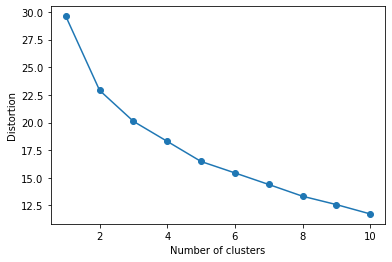

In [18]:
plot_distortion(X,max_clusters=10)

In [19]:
# 3 Cluster as per elbow
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_ [0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [20]:
# add clustering labels
neighborhoods_care_sorted_KM = neighborhoods_care_sorted
neighborhoods_care_sorted_KM.insert(0, 'Cluster tag', kmeans.labels_)


 

In [21]:
neighborhoods_care_sorted_KM

,Cluster tag,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,Adelphi,Medical Lab,Optometrist,Doctor's Office,Family Medicine Doctor,Health and Medicine,Psychiatrist,Hospital,Internal Medicine Doctor,Dentist,Nursing Home
1,0,Allerton,Doctor's Office,Health and Medicine,Hospital,Dentist,Nursing Home,Chiropractor,Family Medicine Doctor,Home Health Care Service,Internal Medicine Doctor,Nutritionist
2,0,Annadale,Doctor's Office,Health and Medicine,Internal Medicine Doctor,Hospital,Dentist,General Surgeon,Chiropractor,Optometrist,Nutritionist,Nursing Home
3,0,Arverne,Nursing Home,Chiropractor,Dentist,Urgent Care Center,Psychiatrist,Physical Therapy Clinic,Pediatrician,Optometrist,Ophthalmologist,Nutritionist
4,0,Aspen Knolls,Doctor's Office,Dentist,Hospital,Optometrist,Chiropractor,Internal Medicine Doctor,Urgent Care Center,Psychiatrist,Veterinarian,Health and Medicine
...,...,...,...,...,...,...,...,...,...,...,...,...
271,0,Williamsburg,Chiropractor,Internal Medicine Doctor,Urgent Care Center,Psychiatrist,Physical Therapy Clinic,Ophthalmologist,Nursing Home,Dentist,Medical Lab,Hospital
272,0,Willowbrook,Health and Medicine,Veterinarian,Doctor's Office,Family Medicine Doctor,Urgent Care Center,Hospital,Pediatrician,Nursing Home,Ophthalmologist,Psychiatrist
273,0,Wingate,Doctor's Office,Health and Medicine,Hospital,Chiropractor,Optometrist,Medical Center,Dentist,Nursing Home,Nutritionist,Ophthalmologist
274,0,Woodhaven,Doctor's Office,Health and Medicine,Nursing Home,Dentist,Hospital,Internal Medicine Doctor,Urgent Care Center,General Surgeon,Optometrist,Medical Lab


In [22]:
manhattan_merged = df.copy()

# merge to add latitude/longitude for each neighborhood
manhattan_merged1 = manhattan_merged.merge(neighborhoods_care_sorted_KM, left_on='neighborhood', right_on='Neighborhood')


In [23]:
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged1['latitude'], manhattan_merged1['longitude'], manhattan_merged1['neighborhood'], manhattan_merged1['Cluster tag']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [24]:
manhattan_merged1.loc[manhattan_merged1['Cluster tag'] == 0, manhattan_merged1.columns[[1] + list(range(5, manhattan_merged1.shape[1]))]]
manhattan_merged1.drop(columns= ['latitude', 'longitude'])


,neighborhood,borough,Cluster tag,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allerton,Bronx,0,Allerton,Doctor's Office,Health and Medicine,Hospital,Dentist,Nursing Home,Chiropractor,Family Medicine Doctor,Home Health Care Service,Internal Medicine Doctor,Nutritionist
1,Annadale,Staten Island,0,Annadale,Doctor's Office,Health and Medicine,Internal Medicine Doctor,Hospital,Dentist,General Surgeon,Chiropractor,Optometrist,Nutritionist,Nursing Home
2,Arverne,Queens,0,Arverne,Nursing Home,Chiropractor,Dentist,Urgent Care Center,Psychiatrist,Physical Therapy Clinic,Pediatrician,Optometrist,Ophthalmologist,Nutritionist
3,Astoria,Queens,0,Astoria,Health and Medicine,Hospital,Doctor's Office,Internal Medicine Doctor,Dentist,Chiropractor,Optometrist,Ophthalmologist,Nursing Home,Medical Lab
4,Astoria Heights,Queens,0,Astoria Heights,Nursing Home,Health and Medicine,Internal Medicine Doctor,Chiropractor,Urgent Care Center,Psychiatrist,Physical Therapy Clinic,Pediatrician,Optometrist,Ophthalmologist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,Williamsburg,Brooklyn,0,Williamsburg,Chiropractor,Internal Medicine Doctor,Urgent Care Center,Psychiatrist,Physical Therapy Clinic,Ophthalmologist,Nursing Home,Dentist,Medical Lab,Hospital
165,Willowbrook,Staten Island,0,Willowbrook,Health and Medicine,Veterinarian,Doctor's Office,Family Medicine Doctor,Urgent Care Center,Hospital,Pediatrician,Nursing Home,Ophthalmologist,Psychiatrist
166,Wingate,Brooklyn,0,Wingate,Doctor's Office,Health and Medicine,Hospital,Chiropractor,Optometrist,Medical Center,Dentist,Nursing Home,Nutritionist,Ophthalmologist
167,Woodhaven,Queens,0,Woodhaven,Doctor's Office,Health and Medicine,Nursing Home,Dentist,Hospital,Internal Medicine Doctor,Urgent Care Center,General Surgeon,Optometrist,Medical Lab


In [25]:
manhattan_merged1.loc[manhattan_merged1['Cluster tag'] == 1, manhattan_merged1.columns[[1] + list(range(5, manhattan_merged1.shape[1]))]]


,longitude,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,-73.786488,City Island,Health and Medicine,Chiropractor,Nursing Home,Urgent Care Center,Psychiatrist,Physical Therapy Clinic,Pediatrician,Optometrist,Ophthalmologist,Nutritionist
61,-73.990947,Flatiron,Health and Medicine,Chiropractor,Nursing Home,Urgent Care Center,Psychiatrist,Physical Therapy Clinic,Pediatrician,Optometrist,Ophthalmologist,Nutritionist
125,-74.174645,Port Ivory,Health and Medicine,Chiropractor,Nursing Home,Urgent Care Center,Psychiatrist,Physical Therapy Clinic,Pediatrician,Optometrist,Ophthalmologist,Nutritionist


In [26]:
manhattan_merged1.loc[manhattan_merged1['Cluster tag'] == 2, manhattan_merged1.columns[[1] + list(range(5, manhattan_merged1.shape[1]))]]


,longitude,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
111,-73.916556,Mount Eden,Dentist,Chiropractor,Urgent Care Center,Psychiatrist,Physical Therapy Clinic,Pediatrician,Optometrist,Ophthalmologist,Nutritionist,Nursing Home
130,-74.012759,Red Hook,Dentist,Chiropractor,Urgent Care Center,Psychiatrist,Physical Therapy Clinic,Pediatrician,Optometrist,Ophthalmologist,Nutritionist,Nursing Home


In [27]:
from sklearn import metrics

metrics.silhouette_score(manhattan_grouped_clustering, kmeans.labels_, metric='euclidean')


0.6295308322110155

### Modeling

Use different attributes and clustering techniques and compare the created clusters:

- clustering only on restaurant features
- clustering only on Uber features
- clustering only on location
- combination of all

**Questions:**
1. Which clustering is the best?
2. How are neighborhoods split when we select only 2 clusters?
3. Are there any differences in housing and rental costs in different clusters?

In [28]:


from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

def plot_dendrogram(X, method='ward'):
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel("Points")
    plt.show()
                             

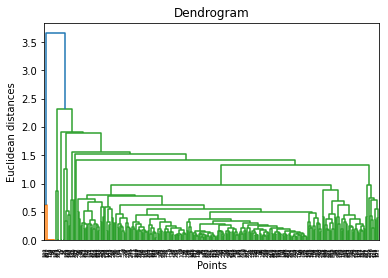

In [29]:
plot_dendrogram(X)

# Dendrogram shows 3 clusters

In [30]:
from sklearn.cluster import AgglomerativeClustering
import sklearn

ac = AgglomerativeClustering(affinity='euclidean', linkage='ward', n_clusters=3)

In [31]:
y_hc = ac.fit_predict(X)


In [32]:
neighborhoods_care_sorted.insert(0, 'Cluster label', y_hc)

In [33]:
from sklearn import metrics

metrics.silhouette_score(manhattan_grouped_clustering, y_hc, metric='euclidean')


0.6426512334019914

In [34]:
hc_clusters = 3

In [36]:
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(zoom_start=11)

# set color scheme for the clusters
x = np.arange(hc_clusters)
ys = [i + x + (i*x)**2 for i in range(hc_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged1['latitude'], manhattan_merged1['longitude'], manhattan_merged1['neighborhood'], manhattan_merged1['Cluster tag']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters